In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

'en_US.UTF-8'

In [2]:
fentanyl_csv = "Resources_PH/Fentanyl_Total.csv"
heroin_csv = "Resources_PH/Heroin_Total.csv"
methadone_csv = "Resources_PH/Methadone_Total.csv"
opiates_csv = "Resources_PH/Opiates_Total.csv"
other_opioids_csv = "Resources_PH/Other_Opioids_Total.csv"
prescription_csv = "Resources_PH/Prescription_Total.csv"

In [3]:
fentanyl_df = pd.read_csv(fentanyl_csv)
heroin_df = pd.read_csv(heroin_csv)
methadone_df = pd.read_csv(methadone_csv)
opiates_df = pd.read_csv(opiates_csv)
other_opioids_df = pd.read_csv(other_opioids_csv)
prescription_df = pd.read_csv(prescription_csv)

In [4]:
#Merge the DataFrames together based on County
merge1_df = pd.merge(fentanyl_df, heroin_df, on='County', suffixes=('_Fentanyl', '_Heroin'))

merge2_df = pd.merge(merge1_df, methadone_df, on='County')
merge2_df = merge2_df.rename(columns={"2007":"2007_Methadone",
                                      "2008":"2008_Methadone",
                                      "2009":"2009_Methadone",
                                      "2010":"2010_Methadone",
                                      "2011":"2011_Methadone",
                                      "2012":"2012_Methadone",
                                      "2013":"2013_Methadone",
                                      "2014":"2014_Methadone",
                                      "2015":"2015_Methadone",
                                      "2016":"2016_Methadone",
                                      "2017":"2017_Methadone",
                                      "2018 **":"2018**_Methadone",
                                      "2019 **":"2019**_Methadone"})

merge3_df = pd.merge(merge2_df, opiates_df, on='County')
merge3_df = merge3_df.rename(columns={"2007":"2007_Opiates",
                                      "2008":"2008_Opiates",
                                      "2009":"2009_Opiates",
                                      "2010":"2010_Opiates",
                                      "2011":"2011_Opiates",
                                      "2012":"2012_Opiates",
                                      "2013":"2013_Opiates",
                                      "2014":"2014_Opiates",
                                      "2015":"2015_Opiates",
                                      "2016":"2016_Opiates",
                                      "2017":"2017_Opiates",
                                      "2018 **":"2018**_Opiates",
                                      "2019 **":"2019**_Opiates"})

merge4_df = pd.merge(merge3_df, other_opioids_df, on='County')
merge4_df = merge4_df.rename(columns={"2007":"2007_Other_Opioids",
                                      "2008":"2008_Other_Opioids",
                                      "2009":"2009_Other_Opioids",
                                      "2010":"2010_Other_Opioids",
                                      "2011":"2011_Other_Opioids",
                                      "2012":"2012_Other_Opioids",
                                      "2013":"2013_Other_Opioids",
                                      "2014":"2014_Other_Opioids",
                                      "2015":"2015_Other_Opioids",
                                      "2016":"2016_Other_Opioids",
                                      "2017":"2017_Other_Opioids",
                                      "2018 **":"2018**_Other_Opioids",
                                      "2019 **":"2019**_Other_Opioids"})

merge5_df = pd.merge(merge4_df, prescription_df, on='County')
merge5_df = merge5_df.rename(columns={"2007":"2007_Prescription",
                                      "2008":"2008_Prescription",
                                      "2009":"2009_Prescription",
                                      "2010":"2010_Prescription",
                                      "2011":"2011_Prescription",
                                      "2012":"2012_Prescription",
                                      "2013":"2013_Prescription",
                                      "2014":"2014_Prescription",
                                      "2015":"2015_Prescription",
                                      "2016":"2016_Prescription",
                                      "2017":"2017_Prescription",
                                      "2018 **":"2018**_Prescription",
                                      "2019 **":"2019**_Prescription"})

merge5_df.columns

total_death_count_df = merge5_df.drop(columns=['2007_Fentanyl', '2018 **_Fentanyl', '2019 **_Fentanyl', 
                                   '2007_Heroin', '2018 **_Heroin', '2019 **_Heroin', 
                                   '2007_Methadone', '2018**_Methadone', '2019**_Methadone', 
                                   '2007_Opiates', '2018**_Opiates', '2019**_Opiates', 
                                   '2007_Other_Opioids', '2018**_Other_Opioids', '2019**_Other_Opioids', 
                                   '2007_Prescription', '2018**_Prescription', '2019**_Prescription'])

total_death_count_df = total_death_count_df.set_index(['County'])
total_death_count_df.head()

,2008_Fentanyl,2009_Fentanyl,2010_Fentanyl,2011_Fentanyl,2012_Fentanyl,2013_Fentanyl,2014_Fentanyl,2015_Fentanyl,2016_Fentanyl,2017_Fentanyl,...,2008_Prescription,2009_Prescription,2010_Prescription,2011_Prescription,2012_Prescription,2013_Prescription,2014_Prescription,2015_Prescription,2016_Prescription,2017_Prescription
County,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,1,4,5,5,10,...,1,1,1,0,1,3,5,6,7,10
Allen,0,0,0,1,1,2,0,6,18,26,...,1,2,2,4,7,8,6,15,21,31
Ashland,0,0,0,1,0,0,1,1,2,2,...,1,0,1,2,0,0,2,2,3,2
Ashtabula,0,2,1,0,0,0,2,4,27,13,...,2,3,3,1,3,3,7,9,31,16
Athens,1,0,0,2,0,0,2,2,0,1,...,1,3,3,11,3,4,5,5,5,4


In [5]:
death_count_county = total_death_count_df.drop(['NonOH', 'Unknown'])

#death_count_county.to_csv("Resources_PH/Death_Count_County.csv")

death_count_county.head()

,2008_Fentanyl,2009_Fentanyl,2010_Fentanyl,2011_Fentanyl,2012_Fentanyl,2013_Fentanyl,2014_Fentanyl,2015_Fentanyl,2016_Fentanyl,2017_Fentanyl,...,2008_Prescription,2009_Prescription,2010_Prescription,2011_Prescription,2012_Prescription,2013_Prescription,2014_Prescription,2015_Prescription,2016_Prescription,2017_Prescription
County,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,1,4,5,5,10,...,1,1,1,0,1,3,5,6,7,10
Allen,0,0,0,1,1,2,0,6,18,26,...,1,2,2,4,7,8,6,15,21,31
Ashland,0,0,0,1,0,0,1,1,2,2,...,1,0,1,2,0,0,2,2,3,2
Ashtabula,0,2,1,0,0,0,2,4,27,13,...,2,3,3,1,3,3,7,9,31,16
Athens,1,0,0,2,0,0,2,2,0,1,...,1,3,3,11,3,4,5,5,5,4


In [6]:
#Create new columns for total deaths in each year
death_count_county["Total Deaths in 2008"] = death_count_county["2008_Fentanyl"] + death_count_county["2008_Heroin"] + death_count_county["2008_Methadone"] + death_count_county["2008_Opiates"] + death_count_county["2008_Other_Opioids"] + death_count_county["2008_Prescription"]
death_count_county["Total Deaths in 2009"] = death_count_county["2009_Fentanyl"] + death_count_county["2009_Heroin"] + death_count_county["2009_Methadone"] + death_count_county["2009_Opiates"] + death_count_county["2009_Other_Opioids"] + death_count_county["2009_Prescription"]
death_count_county["Total Deaths in 2010"] = death_count_county["2010_Fentanyl"] + death_count_county["2010_Heroin"] + death_count_county["2010_Methadone"] + death_count_county["2010_Opiates"] + death_count_county["2010_Other_Opioids"] + death_count_county["2010_Prescription"]
death_count_county["Total Deaths in 2011"] = death_count_county["2011_Fentanyl"] + death_count_county["2011_Heroin"] + death_count_county["2011_Methadone"] + death_count_county["2011_Opiates"] + death_count_county["2011_Other_Opioids"] + death_count_county["2011_Prescription"]
death_count_county["Total Deaths in 2012"] = death_count_county["2012_Fentanyl"] + death_count_county["2012_Heroin"] + death_count_county["2012_Methadone"] + death_count_county["2012_Opiates"] + death_count_county["2012_Other_Opioids"] + death_count_county["2012_Prescription"]
death_count_county["Total Deaths in 2013"] = death_count_county["2013_Fentanyl"] + death_count_county["2013_Heroin"] + death_count_county["2013_Methadone"] + death_count_county["2013_Opiates"] + death_count_county["2013_Other_Opioids"] + death_count_county["2013_Prescription"]
death_count_county["Total Deaths in 2014"] = death_count_county["2014_Fentanyl"] + death_count_county["2014_Heroin"] + death_count_county["2014_Methadone"] + death_count_county["2014_Opiates"] + death_count_county["2014_Other_Opioids"] + death_count_county["2014_Prescription"]
death_count_county["Total Deaths in 2015"] = death_count_county["2015_Fentanyl"] + death_count_county["2015_Heroin"] + death_count_county["2015_Methadone"] + death_count_county["2015_Opiates"] + death_count_county["2015_Other_Opioids"] + death_count_county["2015_Prescription"]
death_count_county["Total Deaths in 2016"] = death_count_county["2016_Fentanyl"] + death_count_county["2016_Heroin"] + death_count_county["2016_Methadone"] + death_count_county["2016_Opiates"] + death_count_county["2016_Other_Opioids"] + death_count_county["2016_Prescription"]
death_count_county["Total Deaths in 2017"] = death_count_county["2017_Fentanyl"] + death_count_county["2017_Heroin"] + death_count_county["2017_Methadone"] + death_count_county["2017_Opiates"] + death_count_county["2017_Other_Opioids"] + death_count_county["2017_Prescription"]
death_count_county["Total Deaths"] = death_count_county["Total Deaths in 2008"] + death_count_county["Total Deaths in 2009"] + death_count_county["Total Deaths in 2010"] + death_count_county["Total Deaths in 2011"] + death_count_county["Total Deaths in 2012"] + death_count_county["Total Deaths in 2013"] + death_count_county["Total Deaths in 2014"] + death_count_county["Total Deaths in 2015"] + death_count_county["Total Deaths in 2016"] + death_count_county["Total Deaths in 2017"]

death_count_county.head()

,2008_Fentanyl,2009_Fentanyl,2010_Fentanyl,2011_Fentanyl,2012_Fentanyl,2013_Fentanyl,2014_Fentanyl,2015_Fentanyl,2016_Fentanyl,2017_Fentanyl,...,Total Deaths in 2009,Total Deaths in 2010,Total Deaths in 2011,Total Deaths in 2012,Total Deaths in 2013,Total Deaths in 2014,Total Deaths in 2015,Total Deaths in 2016,Total Deaths in 2017,Total Deaths
County,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,1,4,5,5,10,...,3,3,0,9,10,28,26,35,40,158
Allen,0,0,0,1,1,2,0,6,18,26,...,6,6,14,30,31,20,56,74,95,334
Ashland,0,0,0,1,0,0,1,1,2,2,...,0,4,7,0,0,9,12,10,7,53
Ashtabula,0,2,1,0,0,0,2,4,27,13,...,9,11,5,31,24,47,37,128,53,351
Athens,1,0,0,2,0,0,2,2,0,1,...,13,9,37,18,21,21,20,17,14,173


In [7]:
deaths_per_year_county = death_count_county[['Total Deaths in 2008',
       'Total Deaths in 2009', 'Total Deaths in 2010', 'Total Deaths in 2011',
       'Total Deaths in 2012', 'Total Deaths in 2013', 'Total Deaths in 2014',
       'Total Deaths in 2015', 'Total Deaths in 2016', 'Total Deaths in 2017']]

deaths_per_year_county.to_csv('Resources_PH/Death_Per_Year_County.csv')

deaths_per_year_county.head()

,Total Deaths in 2008,Total Deaths in 2009,Total Deaths in 2010,Total Deaths in 2011,Total Deaths in 2012,Total Deaths in 2013,Total Deaths in 2014,Total Deaths in 2015,Total Deaths in 2016,Total Deaths in 2017
County,,,,,,,,,,
Adams,4,3,3,0,9,10,28,26,35,40
Allen,2,6,6,14,30,31,20,56,74,95
Ashland,4,0,4,7,0,0,9,12,10,7
Ashtabula,6,9,11,5,31,24,47,37,128,53
Athens,3,13,9,37,18,21,21,20,17,14


In [8]:
death_totals_year = deaths_per_year_county.sum()
death_totals_year

Total Deaths in 2008     2027
Total Deaths in 2009     2163
Total Deaths in 2010     2677
Total Deaths in 2011     3127
Total Deaths in 2012     3298
Total Deaths in 2013     3905
Total Deaths in 2014     5562
Total Deaths in 2015     7704
Total Deaths in 2016    11030
Total Deaths in 2017    13424
dtype: int64

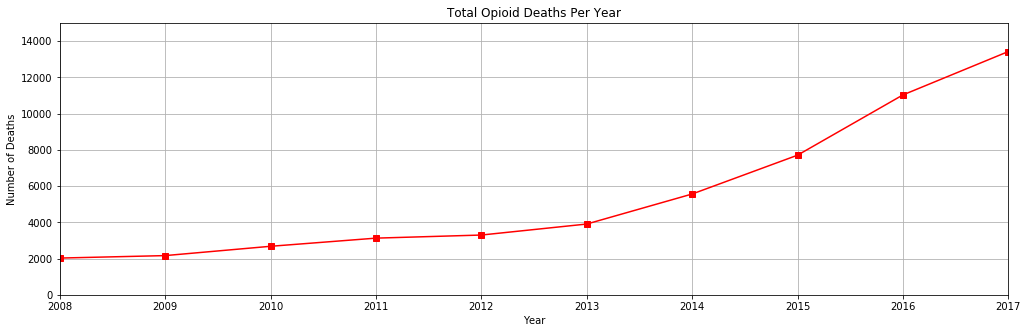

In [9]:
plt.figure(figsize=(17,5))

years = np.arange(2008, 2018, 1)

death_totals = death_totals_year

plt.plot(years, death_totals, marker="s", color="red")

plt.title("Total Opioid Deaths Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")

plt.xlim(2008,2017)
plt.ylim(0,15000)

plt.grid()

plt.savefig("Images_PH/total_deaths_per_year.png")

plt.show()

In [10]:
total_deaths_by_county = death_count_county[['Total Deaths']]

total_deaths_by_county = total_deaths_by_county.reset_index()

total_deaths_by_county.head()

,County,Total Deaths
0,Adams,158
1,Allen,334
2,Ashland,53
3,Ashtabula,351
4,Athens,173


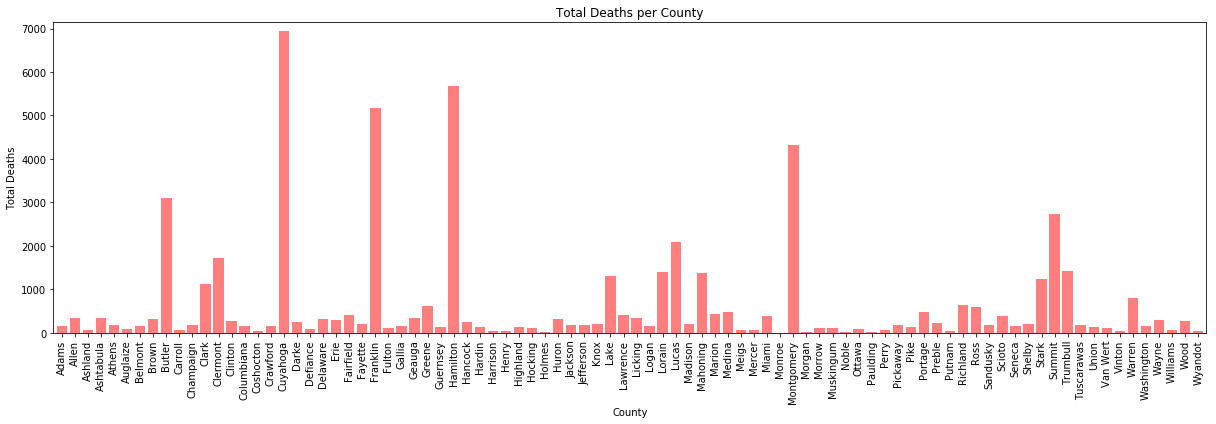

In [11]:
# Set x axis and tick locations
x_axis = np.arange(len(total_deaths_by_county))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(17,6))
plt.bar(x_axis, total_deaths_by_county["Total Deaths"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, total_deaths_by_county["County"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(total_deaths_by_county["Total Deaths"])+200)

# Set a Title and labels
plt.title("Total Deaths per County")
plt.xlabel("County")
plt.ylabel("Total Deaths")

plt.tight_layout()

plt.savefig("Images_PH/total_deaths_per_county.png")

plt.show()

In [12]:
total_deaths_county = death_count_county[['Total Deaths in 2008',
       'Total Deaths in 2009', 'Total Deaths in 2010', 'Total Deaths in 2011',
       'Total Deaths in 2012', 'Total Deaths in 2013', 'Total Deaths in 2014',
       'Total Deaths in 2015', 'Total Deaths in 2016', 'Total Deaths in 2017', 'Total Deaths']]

total_deaths_county.head()

,Total Deaths in 2008,Total Deaths in 2009,Total Deaths in 2010,Total Deaths in 2011,Total Deaths in 2012,Total Deaths in 2013,Total Deaths in 2014,Total Deaths in 2015,Total Deaths in 2016,Total Deaths in 2017,Total Deaths
County,,,,,,,,,,,
Adams,4,3,3,0,9,10,28,26,35,40,158
Allen,2,6,6,14,30,31,20,56,74,95,334
Ashland,4,0,4,7,0,0,9,12,10,7,53
Ashtabula,6,9,11,5,31,24,47,37,128,53,351
Athens,3,13,9,37,18,21,21,20,17,14,173


In [13]:
largest_deaths_year_county = total_deaths_county.loc[(total_deaths_county["Total Deaths"] >= 2000)]

largest_deaths_year_county

,Total Deaths in 2008,Total Deaths in 2009,Total Deaths in 2010,Total Deaths in 2011,Total Deaths in 2012,Total Deaths in 2013,Total Deaths in 2014,Total Deaths in 2015,Total Deaths in 2016,Total Deaths in 2017,Total Deaths
County,,,,,,,,,,,
Butler,100,135,113,151,111,217,370,562,595,737,3091
Cuyahoga,253,271,300,459,452,513,572,670,1673,1779,6942
Franklin,226,282,398,429,389,380,423,613,797,1238,5175
Hamilton,198,168,227,289,331,435,637,1034,987,1380,5686
Lucas,85,87,103,75,172,155,311,306,394,393,2081
Montgomery,181,140,109,142,153,212,421,578,895,1500,4331
Summit,49,80,100,78,154,132,293,411,846,597,2740


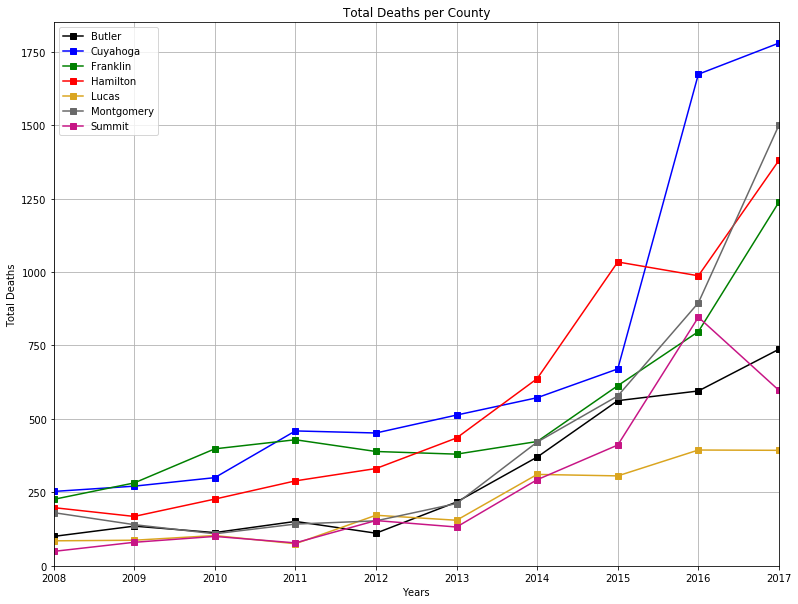

In [14]:
years = np.arange(2008, 2018, 1)
Butler = [100, 135, 113, 151, 111, 217, 370, 562, 595, 737]
Cuyahoga = [253, 271, 300, 459, 452, 513, 572, 670, 1673, 1779]
Franklin = [226, 282, 398, 429, 389, 380, 423, 613, 797, 1238]
Hamilton = [198, 168, 227, 289, 331, 435, 637, 1034, 987, 1380]
Lucas = [85, 87, 103, 75, 172, 155, 311, 306, 394, 393]
Montgomery = [181, 140, 109, 142, 153, 212, 421, 578, 895, 1500]
Summit = [49, 80, 100, 78, 154, 132, 293, 411, 846, 597]

plt.figure(figsize=(13,10))

Butler, = plt.plot(years, Butler, marker="s", color="black", label="Butler")
Cuyahoga, = plt.plot(years, Cuyahoga, marker="s", color="blue", label="Cuyahoga")
Franklin, = plt.plot(years, Franklin, marker="s", color="green", label="Franklin")
Hamilton, = plt.plot(years, Hamilton, marker="s", color="red", label="Hamilton")
Lucas, = plt.plot(years, Lucas, marker="s", color="goldenrod", label="Lucas")
Montgomery, = plt.plot(years, Montgomery, marker="s", color="dimgray", label="Montgomery")
Summit, = plt.plot(years, Summit, marker="s", color="mediumvioletred", label="Summit")

plt.title("Total Deaths per County")
plt.xlabel("Years")
plt.ylabel("Total Deaths")

plt.xlim(2008, 2017)
plt.ylim(0, 1850)

plt.legend(handles=[Butler, Cuyahoga, Franklin, Hamilton, Lucas, Montgomery, Summit], loc="best")

plt.grid()

plt.savefig("Images_PH/total_deaths_top7_counties.png")

plt.show()

In [15]:
ohio_foster_care_csv = "Resources_PH/CleanedFoster.csv"

ohio_foster_care = pd.read_csv(ohio_foster_care_csv)


ohio_foster_care = ohio_foster_care.pivot_table('Children In Foster Care', ['Location'], 'Year')

ohio_foster_care = ohio_foster_care.reset_index()

ohio_foster_care.head()

Year,Location,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Adams,114,71,59,92,109,101,119,99,114,122
1,Allen,235,200,183,181,159,147,151,166,199,148
2,Ashland,106,113,130,135,129,132,109,125,131,152
3,Ashtabula,199,185,188,224,242,267,254,256,361,421
4,Athens,180,156,179,125,129,122,137,145,178,181


In [16]:
ohio_foster_care = ohio_foster_care.rename(columns={"Location":"County"})

ohio_foster_care["Total Kids in Foster Care"] = ohio_foster_care[2008] + ohio_foster_care[2009] + ohio_foster_care[2010] + ohio_foster_care[2011] + ohio_foster_care[2012] + ohio_foster_care[2013] + ohio_foster_care[2014] + ohio_foster_care[2015] + ohio_foster_care[2016] + ohio_foster_care[2017]

ohio_foster_care.to_csv("Resources_PH/Ohio_Foster_Care.csv")

ohio_foster_care.head()

Year,County,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total Kids in Foster Care
0,Adams,114,71,59,92,109,101,119,99,114,122,1000
1,Allen,235,200,183,181,159,147,151,166,199,148,1769
2,Ashland,106,113,130,135,129,132,109,125,131,152,1262
3,Ashtabula,199,185,188,224,242,267,254,256,361,421,2597
4,Athens,180,156,179,125,129,122,137,145,178,181,1532


In [17]:
merge6_df = pd.merge(total_deaths_county, ohio_foster_care, on='County')

merge6_df.head()

deaths_vs_foster_care = merge6_df

#deaths_vs_foster_care.to_csv("Resources_PH/Deaths_vs_Foster_Care.csv")

deaths_vs_foster_care.head()

,County,Total Deaths in 2008,Total Deaths in 2009,Total Deaths in 2010,Total Deaths in 2011,Total Deaths in 2012,Total Deaths in 2013,Total Deaths in 2014,Total Deaths in 2015,Total Deaths in 2016,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total Kids in Foster Care
0,Adams,4,3,3,0,9,10,28,26,35,...,71,59,92,109,101,119,99,114,122,1000
1,Allen,2,6,6,14,30,31,20,56,74,...,200,183,181,159,147,151,166,199,148,1769
2,Ashland,4,0,4,7,0,0,9,12,10,...,113,130,135,129,132,109,125,131,152,1262
3,Ashtabula,6,9,11,5,31,24,47,37,128,...,185,188,224,242,267,254,256,361,421,2597
4,Athens,3,13,9,37,18,21,21,20,17,...,156,179,125,129,122,137,145,178,181,1532


In [18]:
total_2008_deaths = deaths_vs_foster_care['Total Deaths in 2008'].sum()
total_2009_deaths = deaths_vs_foster_care['Total Deaths in 2009'].sum()
total_2010_deaths = deaths_vs_foster_care['Total Deaths in 2010'].sum()
total_2011_deaths = deaths_vs_foster_care['Total Deaths in 2011'].sum()
total_2012_deaths = deaths_vs_foster_care['Total Deaths in 2012'].sum()
total_2013_deaths = deaths_vs_foster_care['Total Deaths in 2013'].sum()
total_2014_deaths = deaths_vs_foster_care['Total Deaths in 2014'].sum()
total_2015_deaths = deaths_vs_foster_care['Total Deaths in 2015'].sum()
total_2016_deaths = deaths_vs_foster_care['Total Deaths in 2016'].sum()
total_2017_deaths = deaths_vs_foster_care['Total Deaths in 2017'].sum()

In [19]:
total_2008_fosters = deaths_vs_foster_care[2008].sum()
total_2009_fosters = deaths_vs_foster_care[2009].sum()
total_2010_fosters = deaths_vs_foster_care[2010].sum()
total_2011_fosters = deaths_vs_foster_care[2011].sum()
total_2012_fosters = deaths_vs_foster_care[2012].sum()
total_2013_fosters = deaths_vs_foster_care[2013].sum()
total_2014_fosters = deaths_vs_foster_care[2014].sum()
total_2015_fosters = deaths_vs_foster_care[2015].sum()
total_2016_fosters = deaths_vs_foster_care[2016].sum()
total_2017_fosters = deaths_vs_foster_care[2017].sum()

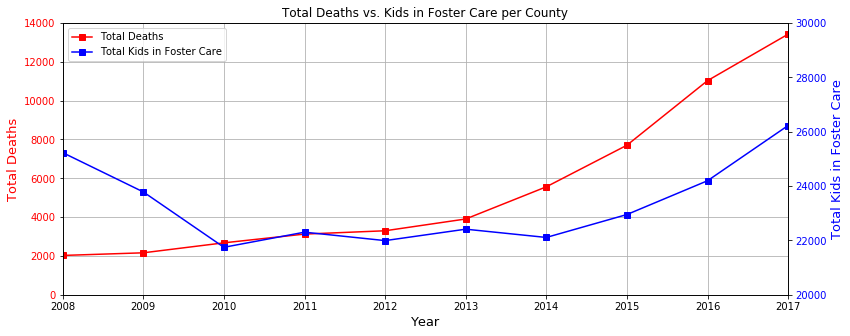

In [20]:
year = np.arange(2008, 2018, 1)
deaths = [total_2008_deaths, total_2009_deaths, total_2010_deaths, total_2011_deaths, total_2012_deaths, total_2013_deaths,
          total_2014_deaths, total_2015_deaths, total_2016_deaths, total_2017_deaths]

fosters = [total_2008_fosters, total_2009_fosters, total_2010_fosters, total_2011_fosters, total_2012_fosters,
           total_2013_fosters, total_2014_fosters, total_2015_fosters, total_2016_fosters, total_2017_fosters]

fig, ax1 = plt.subplots(figsize=(13,5))
year = np.arange(2008, 2018, 1)
line1 = ax1.plot(year, deaths, color="red", label="Total Deaths", marker="s")
ax1.set_xlim(2008, 2017)
ax1.set_ylim(0, 14000)
ax1.set_xlabel("Year", fontsize=13)
ax1.set_ylabel("Total Deaths", fontsize=13, color="red")
for label in ax1.get_yticklabels():
    label.set_color("red")
    
ax2 = ax1.twinx()
line2 = ax2.plot(year, fosters, color="blue", label="Total Kids in Foster Care", marker="s")
ax2.set_ylim(20000, 30000)
ax2.set_ylabel("Total Kids in Foster Care", fontsize=13, color="blue")
for label in ax2.get_yticklabels():
    label.set_color("blue")

plt.title("Total Deaths vs. Kids in Foster Care per County")

lines = line1+line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc='best')

ax1.grid()

plt.savefig("Images_PH/Total_Deaths_v_Foster_Care.png")

plt.show()

In [21]:
population_by_county_csv = "Resources_PH/Counties_by_Population.csv"

population_per_county = pd.read_csv(population_by_county_csv)

population_per_county.head()

,County,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Adams,28686,28500,28547,28466,28300,28096,28063,27914,27832,27726
1,Allen,106773,106518,106366,105975,105233,105025,104843,104093,103626,103198
2,Ashland,53499,53305,53324,53247,53233,53118,53107,53224,53417,53628
3,Ashtabula,101826,101584,101397,101060,100227,99716,99021,98396,98169,97807
4,Athens,64546,64618,65178,65080,64590,64456,64649,65793,66320,66597


In [22]:
merge7_df = pd.merge(deaths_per_year_county, population_per_county, on='County')
deaths_and_population = merge7_df.rename(columns={"2008":"Population in 2008", "2009":"Population in 2009",
                                                 "2010":"Population in 2010", "2011":"Population in 2011",
                                                 "2012":"Population in 2012", "2013":"Population in 2013",
                                                 "2014":"Population in 2014", "2015":"Population in 2015",
                                                 "2016":"Population in 2016", "2017":"Population in 2017"})

deaths_and_population = deaths_and_population[['County', 'Total Deaths in 2008', 'Population in 2008',
                                               'Total Deaths in 2009', 'Population in 2009',
                                               'Total Deaths in 2010', 'Population in 2010',
                                               'Total Deaths in 2011', 'Population in 2011', 
                                               'Total Deaths in 2012', 'Population in 2012',
                                               'Total Deaths in 2013', 'Population in 2013',
                                               'Total Deaths in 2014', 'Population in 2014',
                                               'Total Deaths in 2015', 'Population in 2015',
                                               'Total Deaths in 2016', 'Population in 2016',
                                               'Total Deaths in 2017', 'Population in 2017']]

deaths_and_population.head()

,County,Total Deaths in 2008,Population in 2008,Total Deaths in 2009,Population in 2009,Total Deaths in 2010,Population in 2010,Total Deaths in 2011,Population in 2011,Total Deaths in 2012,...,Total Deaths in 2013,Population in 2013,Total Deaths in 2014,Population in 2014,Total Deaths in 2015,Population in 2015,Total Deaths in 2016,Population in 2016,Total Deaths in 2017,Population in 2017
0,Adams,4,28686,3,28500,3,28547,0,28466,9,...,10,28096,28,28063,26,27914,35,27832,40,27726
1,Allen,2,106773,6,106518,6,106366,14,105975,30,...,31,105025,20,104843,56,104093,74,103626,95,103198
2,Ashland,4,53499,0,53305,4,53324,7,53247,0,...,0,53118,9,53107,12,53224,10,53417,7,53628
3,Ashtabula,6,101826,9,101584,11,101397,5,101060,31,...,24,99716,47,99021,37,98396,128,98169,53,97807
4,Athens,3,64546,13,64618,9,65178,37,65080,18,...,21,64456,21,64649,20,65793,17,66320,14,66597


In [23]:
deaths_and_population["2008 Death Rate"] = deaths_and_population["Total Deaths in 2008"] / deaths_and_population["Population in 2008"] * 100000
deaths_and_population["2009 Death Rate"] = deaths_and_population["Total Deaths in 2009"] / deaths_and_population["Population in 2009"] * 100000
deaths_and_population["2010 Death Rate"] = deaths_and_population["Total Deaths in 2010"] / deaths_and_population["Population in 2010"] * 100000
deaths_and_population["2011 Death Rate"] = deaths_and_population["Total Deaths in 2011"] / deaths_and_population["Population in 2011"] * 100000
deaths_and_population["2012 Death Rate"] = deaths_and_population["Total Deaths in 2012"] / deaths_and_population["Population in 2012"] * 100000
deaths_and_population["2013 Death Rate"] = deaths_and_population["Total Deaths in 2013"] / deaths_and_population["Population in 2013"] * 100000
deaths_and_population["2014 Death Rate"] = deaths_and_population["Total Deaths in 2014"] / deaths_and_population["Population in 2014"] * 100000
deaths_and_population["2015 Death Rate"] = deaths_and_population["Total Deaths in 2015"] / deaths_and_population["Population in 2015"] * 100000
deaths_and_population["2016 Death Rate"] = deaths_and_population["Total Deaths in 2016"] / deaths_and_population["Population in 2016"] * 100000
deaths_and_population["2017 Death Rate"] = deaths_and_population["Total Deaths in 2017"] / deaths_and_population["Population in 2017"] * 100000


deaths_and_population.to_csv("Resources_PH/Deaths_and_Population.csv")

deaths_and_population.head()

,County,Total Deaths in 2008,Population in 2008,Total Deaths in 2009,Population in 2009,Total Deaths in 2010,Population in 2010,Total Deaths in 2011,Population in 2011,Total Deaths in 2012,...,2008 Death Rate,2009 Death Rate,2010 Death Rate,2011 Death Rate,2012 Death Rate,2013 Death Rate,2014 Death Rate,2015 Death Rate,2016 Death Rate,2017 Death Rate
0,Adams,4,28686,3,28500,3,28547,0,28466,9,...,13.944084,10.526316,10.508985,0.000000,31.802120,35.592255,99.775505,93.143226,125.754527,144.268917
1,Allen,2,106773,6,106518,6,106366,14,105975,30,...,1.873133,5.632851,5.640900,13.210663,28.508168,29.516782,19.076142,53.798046,71.410650,92.056048
2,Ashland,4,53499,0,53305,4,53324,7,53247,0,...,7.476775,0.000000,7.501313,13.146281,0.000000,0.000000,16.946918,22.546220,18.720632,13.052883
3,Ashtabula,6,101826,9,101584,11,101397,5,101060,31,...,5.892405,8.859663,10.848447,4.947556,30.929789,24.068354,47.464679,37.603155,130.387393,54.188351
4,Athens,3,64546,13,64618,9,65178,37,65080,18,...,4.647848,20.118233,13.808340,56.853104,27.868091,32.580365,32.483101,30.398371,25.633293,21.021968


In [24]:
death_rate = deaths_and_population[['County', '2008 Death Rate', '2009 Death Rate', '2010 Death Rate', '2011 Death Rate',
                                  '2012 Death Rate', '2013 Death Rate', '2014 Death Rate', '2015 Death Rate',
                                  '2016 Death Rate', '2017 Death Rate']]

death_rate.head()

,County,2008 Death Rate,2009 Death Rate,2010 Death Rate,2011 Death Rate,2012 Death Rate,2013 Death Rate,2014 Death Rate,2015 Death Rate,2016 Death Rate,2017 Death Rate
0,Adams,13.944084,10.526316,10.508985,0.000000,31.802120,35.592255,99.775505,93.143226,125.754527,144.268917
1,Allen,1.873133,5.632851,5.640900,13.210663,28.508168,29.516782,19.076142,53.798046,71.410650,92.056048
2,Ashland,7.476775,0.000000,7.501313,13.146281,0.000000,0.000000,16.946918,22.546220,18.720632,13.052883
3,Ashtabula,5.892405,8.859663,10.848447,4.947556,30.929789,24.068354,47.464679,37.603155,130.387393,54.188351
4,Athens,4.647848,20.118233,13.808340,56.853104,27.868091,32.580365,32.483101,30.398371,25.633293,21.021968


In [25]:
death_rate["Total Death Rate"] = death_rate["2008 Death Rate"] + death_rate["2009 Death Rate"] + death_rate["2010 Death Rate"] + death_rate["2011 Death Rate"] + death_rate["2012 Death Rate"] + death_rate["2013 Death Rate"] + death_rate["2014 Death Rate"] + death_rate["2015 Death Rate"] + death_rate["2016 Death Rate"] + death_rate["2017 Death Rate"]

death_rate.to_csv("Resources_PH/Death_Rate.csv")

death_rate.head()

C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,County,2008 Death Rate,2009 Death Rate,2010 Death Rate,2011 Death Rate,2012 Death Rate,2013 Death Rate,2014 Death Rate,2015 Death Rate,2016 Death Rate,2017 Death Rate,Total Death Rate
0,Adams,13.944084,10.526316,10.508985,0.000000,31.802120,35.592255,99.775505,93.143226,125.754527,144.268917,565.315936
1,Allen,1.873133,5.632851,5.640900,13.210663,28.508168,29.516782,19.076142,53.798046,71.410650,92.056048,320.723382
2,Ashland,7.476775,0.000000,7.501313,13.146281,0.000000,0.000000,16.946918,22.546220,18.720632,13.052883,99.391022
3,Ashtabula,5.892405,8.859663,10.848447,4.947556,30.929789,24.068354,47.464679,37.603155,130.387393,54.188351,355.189792
4,Athens,4.647848,20.118233,13.808340,56.853104,27.868091,32.580365,32.483101,30.398371,25.633293,21.021968,265.412714


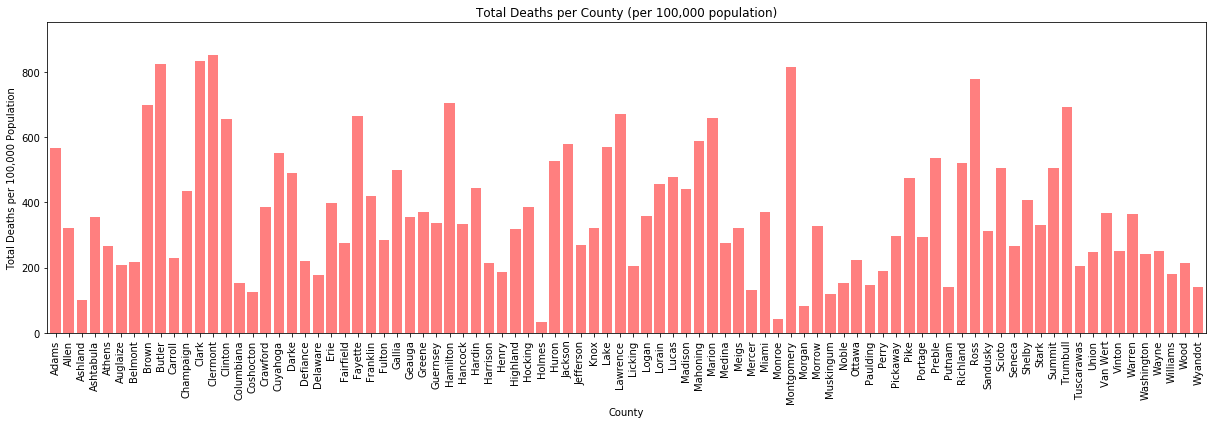

In [26]:
# Set x axis and tick locations
x_axis = np.arange(len(death_rate))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(17,6))
plt.bar(x_axis, death_rate["Total Death Rate"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, death_rate["County"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(death_rate["Total Death Rate"])+100)

# Set a Title and labels
plt.title("Total Deaths per County (per 100,000 population)")
plt.xlabel("County")
plt.ylabel("Total Deaths per 100,000 Population")

plt.tight_layout()

plt.savefig("Images_PH/total_deaths_per_100000_population.png")

plt.show()

In [27]:
largest_deaths_population_county = death_rate.nlargest(5, 'Total Death Rate')

largest_deaths_population_county

,County,2008 Death Rate,2009 Death Rate,2010 Death Rate,2011 Death Rate,2012 Death Rate,2013 Death Rate,2014 Death Rate,2015 Death Rate,2016 Death Rate,2017 Death Rate,Total Death Rate
12,Clermont,43.391478,28.496987,59.213523,57.841845,60.669876,67.380063,105.771761,156.538711,135.457304,136.621387,851.382937
11,Clark,22.237525,23.058410,28.206705,62.430129,58.345185,55.650340,66.063289,148.941190,152.279362,215.522046,832.734181
8,Butler,27.459024,36.821563,30.616005,40.805407,29.965014,58.487886,99.092633,149.639613,157.435313,193.639583,823.962041
56,Montgomery,33.664147,26.153852,20.352376,26.571110,28.642674,39.721723,79.136528,108.791194,168.424618,282.197832,813.656056
70,Ross,28.323141,64.216177,51.224260,60.599028,41.367720,44.010666,98.601417,133.648207,146.924977,108.649257,777.564850


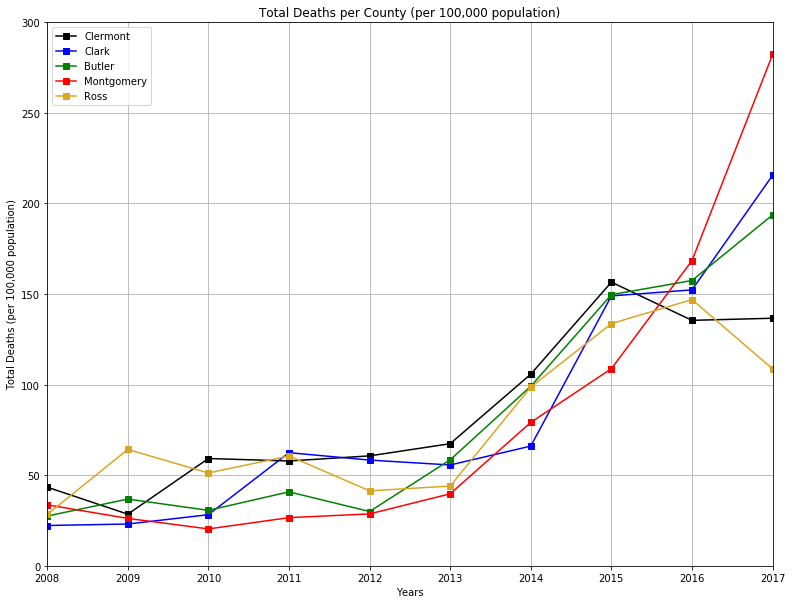

In [28]:
years = np.arange(2008, 2018, 1)

Clermont = [43.391478, 28.496987, 59.213523, 57.841845, 60.669876, 67.380063, 105.771761, 156.538711, 135.457304, 136.621387]
Clark = [22.237525, 23.058410, 28.206705, 62.430129, 58.345185, 55.650340, 66.063289, 148.941190, 152.279362, 215.522046]
Butler = [27.459024, 36.821563, 30.616005, 40.805407, 29.965014, 58.487886, 99.092633, 149.639613, 157.435313, 193.639583]
Montgomery = [33.664147, 26.153852, 20.352376, 26.571110, 28.642674, 39.721723, 79.136528, 108.791194, 168.424618, 282.197832]
Ross = [28.323141, 64.216177, 51.224260, 60.599028, 41.367720, 44.010666, 98.601417, 133.648207, 146.924977, 108.649257]

plt.figure(figsize=(13,10))

Clermont, = plt.plot(years, Clermont, marker="s", color="black", label="Clermont")
Clark, = plt.plot(years, Clark, marker="s", color="blue", label="Clark")
Butler, = plt.plot(years, Butler, marker="s", color="green", label="Butler")
Montgomery, = plt.plot(years, Montgomery, marker="s", color="red", label="Montgomery")
Ross, = plt.plot(years, Ross, marker="s", color="goldenrod", label="Ross")

plt.title("Total Deaths per County (per 100,000 population)")
plt.xlabel("Years")
plt.ylabel("Total Deaths (per 100,000 population)")

plt.xlim(2008, 2017)
plt.ylim(0, 300)

plt.legend(handles=[Clermont, Clark, Butler, Montgomery, Ross], loc="best")

plt.grid()

plt.savefig("Images_PH/total_deaths_top5bypop_counties.png")

plt.show()

In [29]:
input_file = "../Foster/State_data/adopted.csv"
adopted_data = pd.read_csv(input_file)
adopted_data.head()

,State,FY 2008,FY 2009,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017
0,Alabama,442,638,606,447,587,532,544,512,503,504
1,Alaska,294,330,336,293,309,328,367,357,313,366
2,Arizona,"1,695","1,706","2,045","2,275","2,275","2,522","3,090","3,236","3,654","4,298"
3,Arkansas,505,601,597,591,703,691,743,740,758,971
4,California,"7,777","7,438","6,459","5,710","5,938","5,541","5,471","6,079","6,542","6,524"


In [30]:
ohioadopted_data = adopted_data[adopted_data["State"]=="Ohio"]
ohioadopted_data.iloc[0,0]="Children Adopted"
ohioadopted_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioadopted_data[f'{y}']:
        ohioadopted_data[f'{y}']=locale.atoi(x)

ohioadopted_data.head()

C:\Users\nicho\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Children Adopted,1638,1453,1438,1420,1250,1244,1406,1334,1449,1538


In [32]:
input_file = "../Foster/State_data/entered.csv"
entered_data = pd.read_csv(input_file)
ohioentered_data = entered_data[entered_data["State"]=="Ohio"]
ohioentered_data = ohioentered_data.drop("Unnamed: 11",axis=1)
ohioentered_data = ohioentered_data.drop("Unnamed: 12",axis=1)
ohioentered_data.iloc[0,0]="Entered into Care"
ohioentered_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioentered_data[f'{y}']:
        ohioentered_data[f'{y}']=locale.atoi(x)                          
ohioentered_data.head()

,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Entered into Care,10168,8788,9260,9934,9551,9875,9924,10360,10772,11845


In [33]:
input_file = "../Foster/State_data/exited.csv"
exited_data = pd.read_csv(input_file)
ohioexited_data = exited_data[exited_data["State"]=="Ohio"]
ohioexited_data.iloc[0,0]="Exited from Care"
ohioexited_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioexited_data[f'{y}']:
        ohioexited_data[f'{y}']=locale.atoi(x)

ohioexited_data.head()

C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Exited from Care,10804,10073,9085,9471,9356,9212,9340,9328,9921,10234


In [34]:
input_file = "../Foster/State_data/In_care_sept_30.csv"
incare_data = pd.read_csv(input_file)
ohioincare_data = incare_data[incare_data["State"]=="Ohio"]
ohioincare_data.iloc[0,0]="Children in Foster Care"
ohioincare_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioincare_data[f'{y}']:
        ohioincare_data[f'{y}']=locale.atoi(x)
ohioincare_data.head()

C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Children in Foster Care,13703,12232,11940,12069,11877,12223,12519,13205,13725,14961


In [35]:
input_file = "../Foster/State_data/parental_rights.csv"
parent_data = pd.read_csv(input_file)
ohioparent_data = parent_data[parent_data["State"]=="Ohio"]
for x in range(11,19):
    ohioparent_data = ohioparent_data.drop(f"Unnamed: {x}",axis=1)
ohioparent_data.iloc[0,0]="Parent Rights Terminated"
ohioparent_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioparent_data[f'{y}']:
        ohioparent_data[f'{y}']=locale.atoi(x)
ohioparent_data.head()

,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Parent Rights Terminated,2990,2963,2687,2484,2277,2591,2644,2643,2730,2936


In [36]:
input_file = "../Foster/State_data/totalserved.csv"
served_data = pd.read_csv(input_file)
ohioserved_data = served_data[served_data["State"]=="Ohio"]
ohioserved_data.iloc[0,0]="Children Served"
ohioserved_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
for y in range(2008,2018):
    for x in ohioserved_data[f'{y}']:
        ohioserved_data[f'{y}']=locale.atoi(x)
ohioserved_data.head()

C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\nicho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Children Served,24507,22305,21025,21540,21233,21435,21859,22533,23646,25195


In [37]:
input_file = "../Foster/State_data/wating_for_adoption.csv"
waiting_data = pd.read_csv(input_file)
ohiowaiting_data = waiting_data[waiting_data["State"]=="Ohio"]
ohiowaiting_data.iloc[0,0]="Waiting for Adoption"
ohiowaiting_data.columns=["Statistic","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017"]
ohiowaiting_data.head()

C:\Users\nicho\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
35,Waiting for Adoption,3477,3380,3013,2789,2655,2976,2942,3010,3201,3373


In [38]:
combined_df = ohioadopted_data.merge(ohioentered_data,how="outer")
combined_df = combined_df.merge(ohioexited_data,how='outer')
combined_df = combined_df.merge(ohioincare_data,how='outer')
combined_df = combined_df.merge(ohioparent_data,how='outer')
combined_df = combined_df.merge(ohioserved_data,how='outer')
combined_df = combined_df.merge(ohiowaiting_data,how='outer')
combined_df.to_csv(path_or_buf="../Foster/CleanedOhioFosterData.csv")

,Statistic,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Children Adopted,1638,1453,1438,1420,1250,1244,1406,1334,1449,1538
1,Entered into Care,10168,8788,9260,9934,9551,9875,9924,10360,10772,11845
2,Exited from Care,10804,10073,9085,9471,9356,9212,9340,9328,9921,10234
3,Children in Foster Care,13703,12232,11940,12069,11877,12223,12519,13205,13725,14961
4,Parent Rights Terminated,2990,2963,2687,2484,2277,2591,2644,2643,2730,2936
5,Children Served,24507,22305,21025,21540,21233,21435,21859,22533,23646,25195
6,Waiting for Adoption,3477,3380,3013,2789,2655,2976,2942,3010,3201,3373


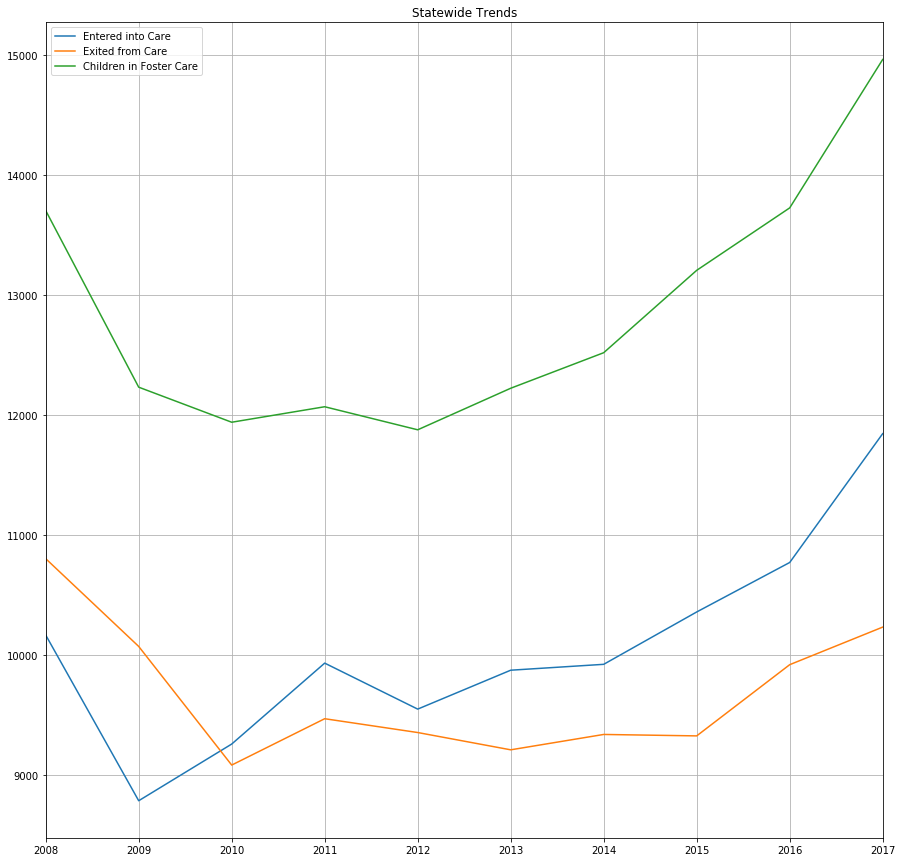

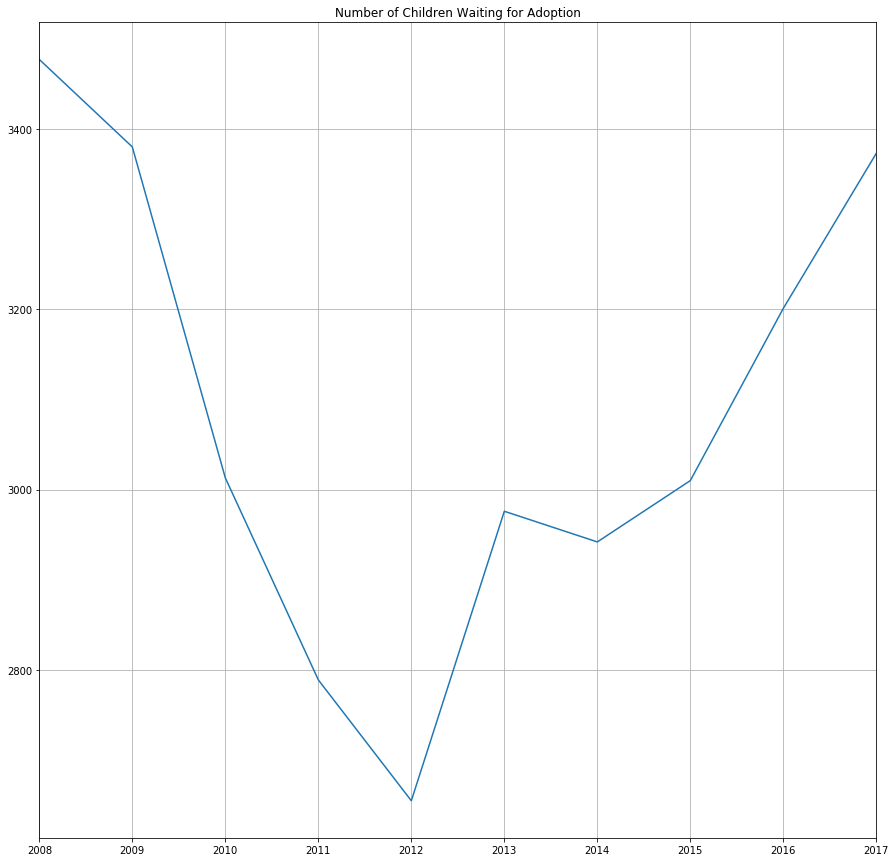

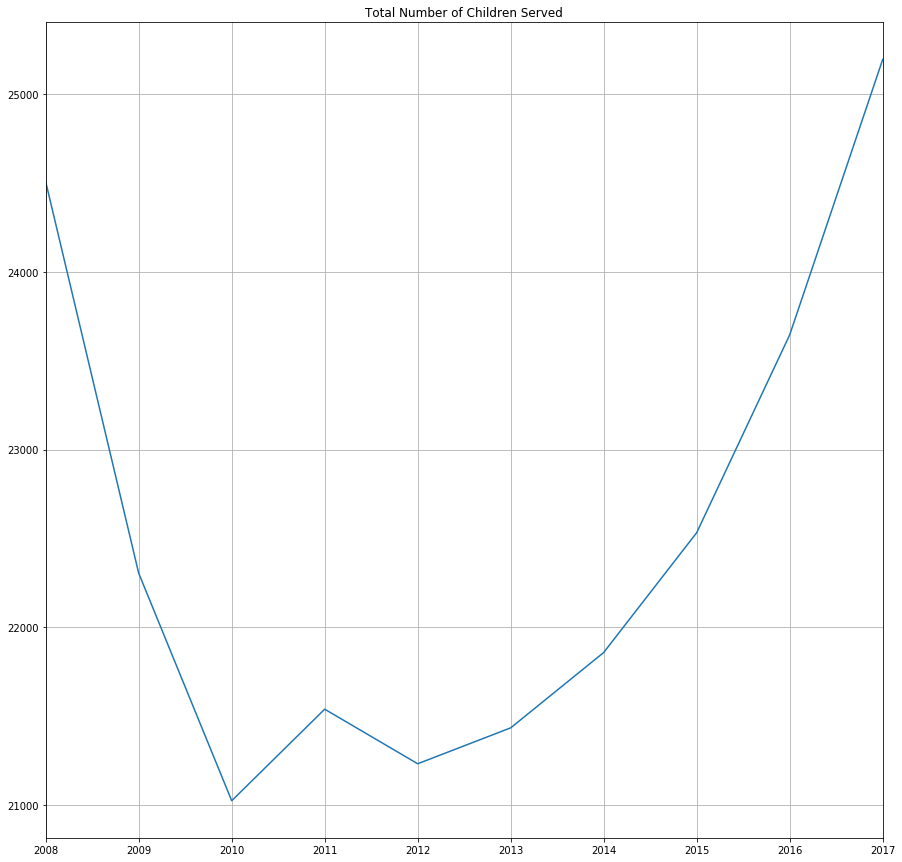

In [43]:
df = pd.read_csv("../Foster/CleanedOhioFosterData.csv")
df=df.drop("Unnamed: 0",axis=1)
adopt = df.mean()
years=df.keys()
df.head(10)


df2 = df.drop('Statistic',axis=1)
adopted=df2.iloc[0]
entered=df2.iloc[1]
exited=df2.iloc[2]
fostered=df2.iloc[3]
rights=df2.iloc[4]
served=df2.iloc[5]
wait=df2.iloc[6]
#adopted.plot(kind='line',label='Children Adopted', figsize=(15,15))
entered.plot(kind='line',label='Entered into Care')
exited.plot(kind='line',label='Exited from Care')
fostered.plot(kind='line',label='Children in Foster Care',figsize=(15,15))
#rights.plot(kind='line',label='Parental Rights Terminated')
#served.plot(kind='line',label='Children Served')
#wait.plot(kind='line',label='Waiting For Adoption')
plt.legend(loc='best')
plt.title("Statewide Trends")
plt.grid()
plt.savefig("Images_PH/State_Trends.png")
plt.show()

wait.plot(kind='line',label='Waiting For Adoption',figsize=(15,15))
plt.title("Number of Children Waiting for Adoption")
plt.grid()
plt.savefig("Images_PH/waiting_foradoption.png")
plt.show()

served.plot(kind='line',label='Children Served',figsize=(15,15))
plt.title("Total Number of Children Served")
plt.grid()
plt.savefig("Images_PH/children_served.png")
plt.show()

In [46]:
input_file = "../Foster/foster.csv"

foster_data = pd.read_csv(input_file)
foster_data.head()

#Begin Cleaning Data
county_df = foster_data.loc[foster_data["Location"]!="Ohio",:]
county_df = county_df.loc[county_df["DataFormat"]!="Rate",:]
county_df = county_df.loc[county_df["TimeFrame"]>2007,:]
county_df.reset_index()
county_df.head(15)

grouped_df = county_df.groupby(["Location","TimeFrame"])
grouped_df = grouped_df["Location","TimeFrame","Data"]
county_df.to_csv(path_or_buf="../Foster/Cleaned_County_Foster.csv")
grouped_df.mean()

input_file2 = "../Foster/foster.csv"
foster_rate = pd.read_csv(input_file2)
foster_rate.head()

county_df2 = foster_rate.loc[foster_rate["Location"]!="Ohio",:]
county_df2 = county_df2.loc[county_df2["DataFormat"]!="Number",:]
county_df2 = county_df2.loc[county_df2["TimeFrame"]>2007,:]
county_df2.reset_index()
county_df2.to_csv(path_or_buf="../Foster/County_Foster_Rates.csv")

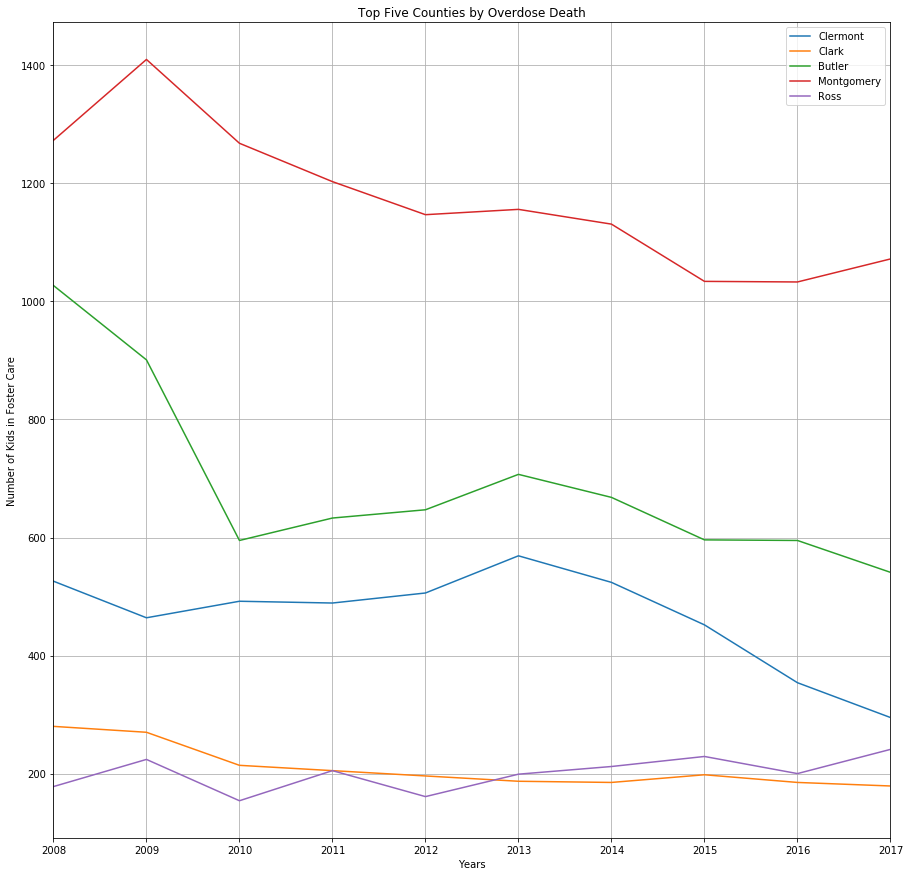

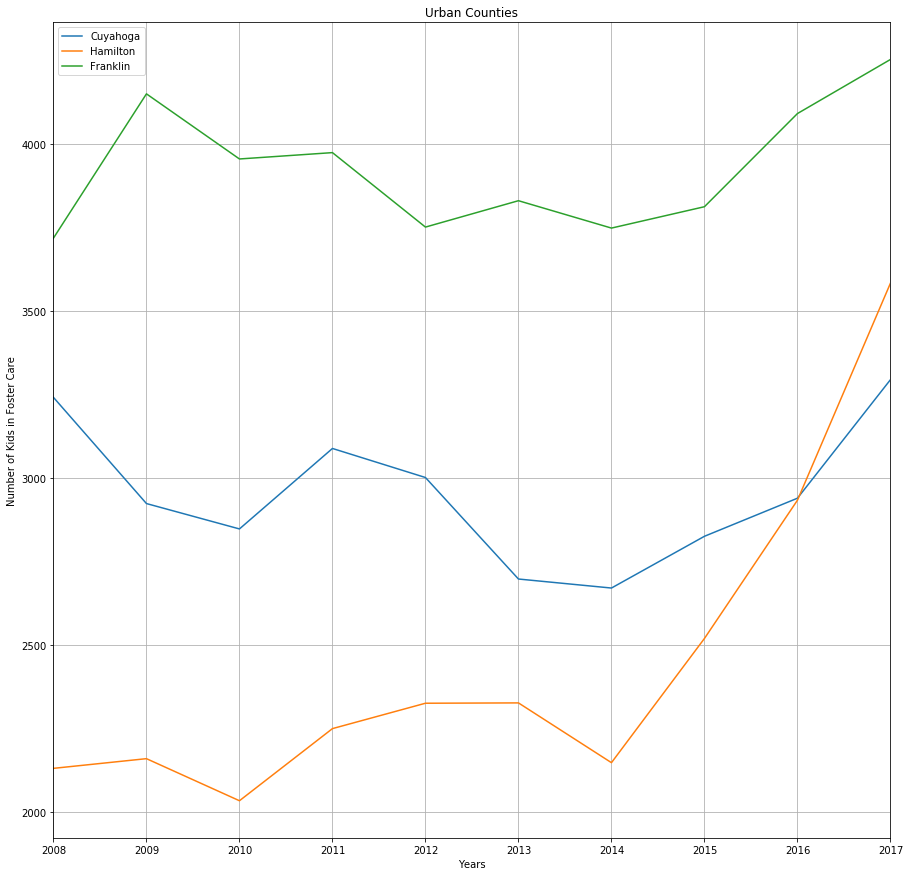

In [50]:
df = pd.read_csv("../Foster/CleanedFoster.csv")
df=df.drop("Unnamed: 0",axis=1)
#df

ax = plt.gca()
clermont=df["Location"]=="Clermont"
clermont=df[clermont]
clermont=clermont.sort_values(by='Year')

clark=df["Location"]=="Clark"
clark=df[clark]
clark=clark.sort_values(by='Year')

butler=df["Location"]=="Butler"
butler=df[butler]
butler=butler.sort_values(by='Year')

montgomery=df["Location"]=="Montgomery"
montgomery=df[montgomery]
montgomery=montgomery.sort_values(by='Year')

ross=df["Location"]=="Ross"
ross=df[ross]
ross=ross.sort_values(by='Year')

trumbull=df["Location"]=="Trumbull"
trumbull=df[trumbull]
trumbull=trumbull.sort_values(by='Year')

hamilton=df["Location"]=="Hamilton"
hamilton=df[hamilton]
hamilton=hamilton.sort_values(by='Year')

clermont.plot(kind='line',x="Year",y='Children In Foster Care',figsize=(15,15),label='Clermont',ax=ax)
clark.plot(kind='line',x="Year",y='Children In Foster Care',label='Clark',ax=ax)
butler.plot(kind='line',x="Year",y='Children In Foster Care',label='Butler',ax=ax)
montgomery.plot(kind='line',x="Year",y='Children In Foster Care',label='Montgomery',ax=ax)
ross.plot(kind='line',x="Year",y='Children In Foster Care',label='Ross',ax=ax)
#trumbull.plot(kind='line',x="Year",y='Children In Foster Care',label='Trumbull',ax=ax)
#hamilton.plot(kind='line',x="Year",y='Children In Foster Care',label='Hamilton',ax=ax)

plt.grid()
plt.title("Top Five Counties by Overdose Death")
plt.xlabel("Years")
plt.ylabel("Number of Kids in Foster Care")
plt.savefig("Images_PH/top_seven_deaths.png")
plt.show()

#ax=plt.gca()
#clermont.plot(kind='line',x="Year",y='Children In Foster Care',figsize=(15,15),label='Clermont',ax=ax)
#clark.plot(kind='line',x="Year",y='Children In Foster Care',label='Clark',ax=ax)
#butler.plot(kind='line',x="Year",y='Children In Foster Care',label='Butler',ax=ax)
#montgomery.plot(kind='line',x="Year",y='Children In Foster Care',label='Montgomery',ax=ax)
#ross.plot(kind='line',x="Year",y='Children In Foster Care',label='Ross',ax=ax)
#trumbull.plot(kind='line',x="Year",y='Children In Foster Care',label='Trumbull',ax=ax)
#hamilton.plot(kind='line',x="Year",y='Children In Foster Care',label='Hamilton',ax=ax)

#plt.grid()
#plt.title("Top Six Counties by Overdose Death (Minus Hamilton)")
#plt.xlabel("Years")
#plt.ylabel("Number of Kids in Foster Care")
#plt.savefig("Images_PH/top_six_deaths.png")
#plt.show()

ax = plt.gca()

cuyahoga=df["Location"]=="Cuyahoga"
cuyahoga=df[cuyahoga]
cuyahoga=cuyahoga.sort_values(by='Year')

hamilton=df["Location"]=="Hamilton"
hamilton=df[hamilton]
hamilton=hamilton.sort_values(by='Year')

franklin=df["Location"]=="Franklin"
franklin=df[franklin]
franklin=franklin.sort_values(by='Year')

cuyahoga.plot(kind='line',x="Year",y='Children In Foster Care',figsize=(15,15),label='Cuyahoga',ax=ax)
hamilton.plot(kind='line',x="Year",y='Children In Foster Care',figsize=(15,15),label='Hamilton',ax=ax)
franklin.plot(kind='line',x="Year",y='Children In Foster Care',figsize=(15,15),label='Franklin',ax=ax)

plt.grid()
plt.title("Urban Counties")
plt.xlabel("Years")
plt.ylabel("Number of Kids in Foster Care")
plt.savefig("Images_PHUrban_Counties.png")



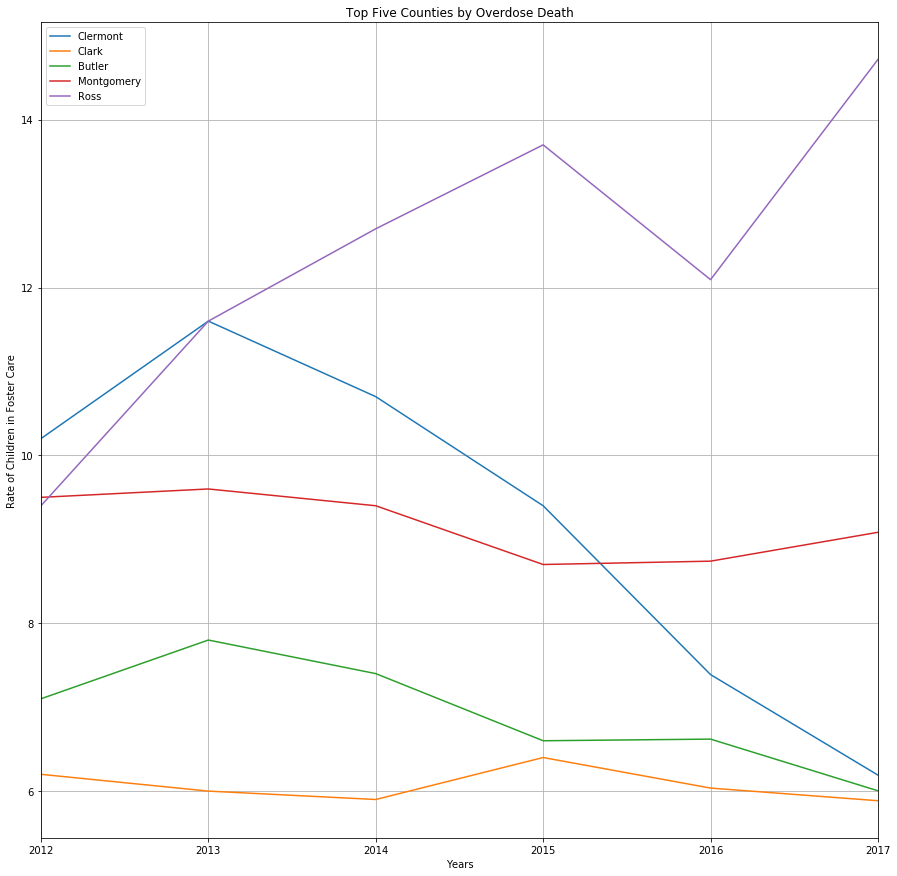

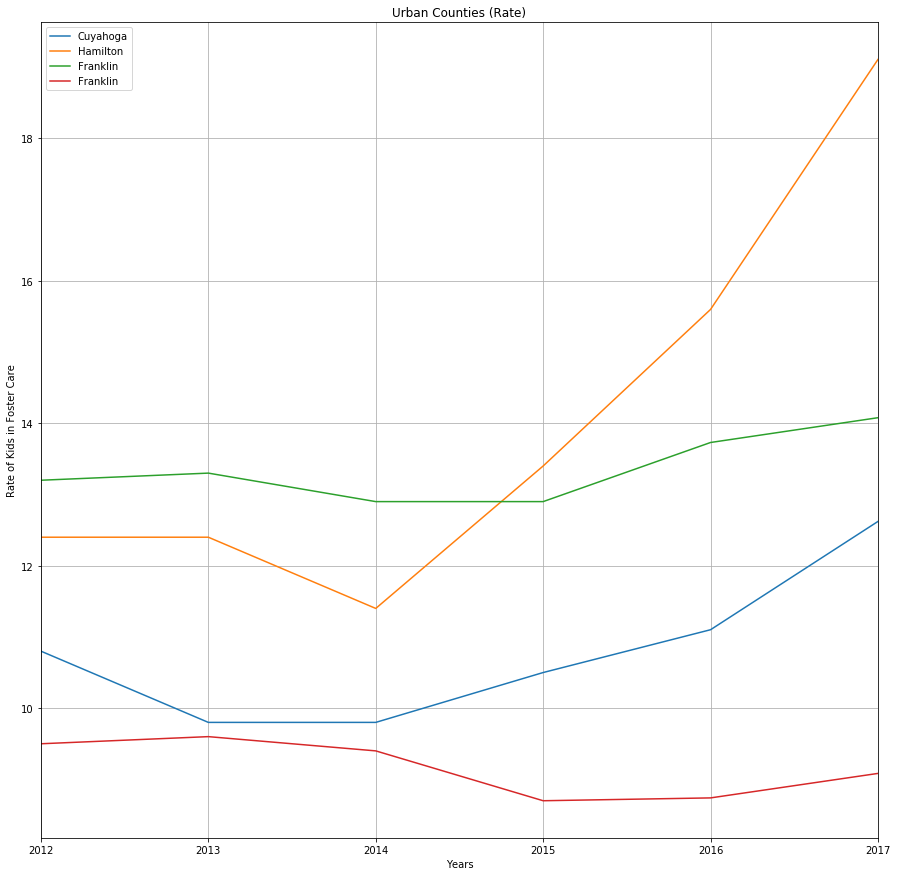

In [52]:
df2 = pd.read_csv("../Foster/county_foster_rates.csv")
df2=df2.drop("Unnamed: 0",axis=1)
df2.head(15)

ax = plt.gca()
clermont=df2["Location"]=="Clermont"
clermont=df2[clermont]
clermont=clermont.sort_values(by='TimeFrame')

clark=df2["Location"]=="Clark"
clark=df2[clark]
clark=clark.sort_values(by='TimeFrame')

butler=df2["Location"]=="Butler"
butler=df2[butler]
butler=butler.sort_values(by='TimeFrame')

montgomery=df2["Location"]=="Montgomery"
montgomery=df2[montgomery]
montgomery=montgomery.sort_values(by='TimeFrame')

ross=df2["Location"]=="Ross"
ross=df2[ross]
ross=ross.sort_values(by='TimeFrame')

#trumbull=df2["Location"]=="Trumbull"
#trumbull=df2[trumbull]
#trumbull=trumbull.sort_values(by='TimeFrame')

#hamilton=df2["Location"]=="Hamilton"
#hamilton=df2[hamilton]
#hamilton=hamilton.sort_values(by='TimeFrame')

clermont.plot(kind='line',x="TimeFrame",y='Data',figsize=(15,15),label='Clermont',ax=ax)
clark.plot(kind='line',x="TimeFrame",y='Data',label='Clark',ax=ax)
butler.plot(kind='line',x="TimeFrame",y='Data',label='Butler',ax=ax)
montgomery.plot(kind='line',x="TimeFrame",y='Data',label='Montgomery',ax=ax)
ross.plot(kind='line',x="TimeFrame",y='Data',label='Ross',ax=ax)

plt.grid()
plt.title("Top Five Counties by Overdose Death")
plt.xlabel("Years")
plt.ylabel("Rate of Children in Foster Care")
plt.savefig("Images_PH/top_seven_deaths_by_rate.png")
plt.show()

ax = plt.gca()

cuyahoga=df2["Location"]=="Cuyahoga"
cuyahoga=df2[cuyahoga]
cuyahoga=cuyahoga.sort_values(by='TimeFrame')

hamilton=df2["Location"]=="Hamilton"
hamilton=df2[hamilton]
hamilton=hamilton.sort_values(by='TimeFrame')

franklin=df2["Location"]=="Franklin"
franklin=df2[franklin]
franklin=franklin.sort_values(by='TimeFrame')

montgomery=df2["Location"]=="Montgomery"
montgomery=df2[montgomery]
montgomery=montgomery.sort_values(by='TimeFrame')

cuyahoga.plot(kind='line',x="TimeFrame",y='Data',figsize=(15,15),label='Cuyahoga',ax=ax)
hamilton.plot(kind='line',x="TimeFrame",y='Data',figsize=(15,15),label='Hamilton',ax=ax)
franklin.plot(kind='line',x="TimeFrame",y='Data',figsize=(15,15),label='Franklin',ax=ax)
montgomery.plot(kind='line',x="TimeFrame",y='Data',figsize=(15,15),label='Franklin',ax=ax)
plt.grid()
plt.title("Urban Counties (Rate)")
plt.xlabel("Years")
plt.ylabel("Rate of Kids in Foster Care")
plt.savefig("Images_PH/Urban_Counties_rate.png")
plt.show()

In [53]:
import scipy.stats as stats

In [118]:
fostercarestate=ohioincare_data.sum()
kidsinfoster=[13703,12232,11940,12069,11877,12223,12519,13205,13725,14961]
deathsperyear=np.array([2027.0,2163.0,2677.0,3127.0,3298.0,3905.0,5562.0,7704.0,11030.0,13424.0])


In [59]:
death_totals_year

Total Deaths in 2008     2027
Total Deaths in 2009     2163
Total Deaths in 2010     2677
Total Deaths in 2011     3127
Total Deaths in 2012     3298
Total Deaths in 2013     3905
Total Deaths in 2014     5562
Total Deaths in 2015     7704
Total Deaths in 2016    11030
Total Deaths in 2017    13424
dtype: int64

In [119]:
slope, intercept, r_value, p_value, std_err = stats.linregress(deathsperyear,kidsinfoster)
fit=((slope*deathsperyear)+intercept)
print(f" slope = {slope}  intercept = {intercept}  r = {r_value} p = {p_value}  err = {std_err}")

 slope = 0.20356738892507348  intercept = 11727.468970240174  r = 0.7947168679757041 p = 0.0060144431634702985  err = 0.05496995563769368


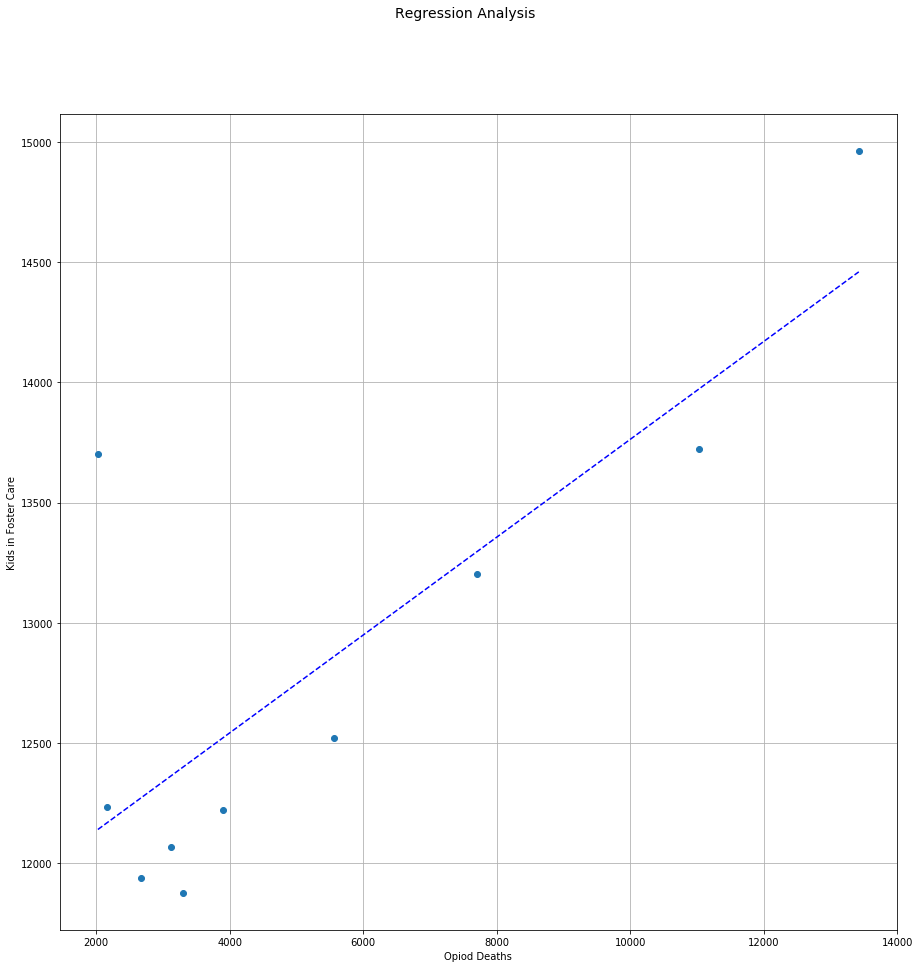

In [121]:
years=np.arange(2008,2018,1)
#fit=((slope*asfloat(deathsperyear)+intercept)

fig, ax = plt.subplots(figsize=(15,15))

fig.suptitle("Regression Analysis", fontsize=14)

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)

ax.set_xlabel("Opiod Deaths")
ax.set_ylabel("Kids in Foster Care")

ax.plot(deathsperyear, kidsinfoster, linewidth=0, marker='o')
ax.plot(deathsperyear, fit, 'b--')
plt.grid()
plt.savefig("Images_PH/Regression.png")
plt.show()